<h1>Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from io import StringIO
import re

In [2]:
#Reading the cleaned and merged dataset
df= pd.read_csv("mergedData.csv")

In [3]:
df.head()

,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative,Loan Flag
0,1,36,1,cork,10001-40000,58,4,1,0.0,NaN,NaN,NaN,0
1,2,43,1,cavan,0-10000,2663,4,0,17.0,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN,0
2,3,32,0,dublin,10001-40000,46,2,0,25.0,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV,0
3,4,52,1,louth,40001-60000,0,2,1,13.0,70.68,5712.0,HARVEY NORMAN CARRICKMINES,0
4,5,63,0,kilkenny,60001-100000,126,1,0,39.0,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001,0


In [4]:
#assigning only neccessary columns
df = df[['Loan Flag','Client ID','Age','Gender','County','Income Group','Average_CA_transaction_amount','No_of_products_held','Held Loan previously','Num Transactions']]

In [5]:
#Only County column has null values, So filling it with None
df.fillna('None', inplace = True)

In [6]:
df.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
0,0,1,36,1,cork,10001-40000,58,4,1,0.0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0


In [7]:
df.isnull().sum()

Loan Flag                        0
Client ID                        0
Age                              0
Gender                           0
County                           0
Income Group                     0
Average_CA_transaction_amount    0
No_of_products_held              0
Held Loan previously             0
Num Transactions                 0
dtype: int64

In [8]:
df.dtypes

Loan Flag                          int64
Client ID                          int64
Age                                int64
Gender                             int64
County                            object
Income Group                      object
Average_CA_transaction_amount      int64
No_of_products_held                int64
Held Loan previously               int64
Num Transactions                 float64
dtype: object

In [9]:
df.describe()

,Loan Flag,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.021100,5000.50000,44.347000,0.509000,444.829200,3.002700,0.249800,18.292900
std,0.143725,2886.89568,14.849857,0.499944,877.434779,1.410068,0.432919,22.962819
min,0.000000,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2500.75000,32.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,5000.50000,44.000000,1.000000,30.000000,3.000000,0.000000,10.000000
75%,0.000000,7500.25000,57.000000,1.000000,402.000000,4.000000,0.000000,30.000000
max,1.000000,10000.00000,100.000000,1.000000,9470.000000,5.000000,1.000000,100.000000


In [10]:
#Number of people who took up ghe loan from the dataset are 211
df['Loan Flag'].value_counts()

0    9789
1     211
Name: Loan Flag, dtype: int64

In [11]:
#Calculating the Loan takers in percentage

In [12]:
count_no_sub = len(df[df['Loan Flag']==0])
count_sub = len(df[df['Loan Flag']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of clients that did not take uo the Loan ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of clients that took up the Loan ", pct_of_sub*100)

percentage of clients that did not take uo the Loan  97.89
percentage of clients that took up the Loan  2.11


In [13]:
#Calculating the avg of all attributes with respective to Loan Flag
df.groupby('Loan Flag').mean()

,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Loan Flag,,,,,,,
0,5001.264787,44.275513,0.508632,403.008888,3.003678,0.239248,17.261722
1,4965.018957,47.663507,0.526066,2385.014218,2.957346,0.739336,66.132701


<h3>Observation</h3>

<h4>There is a significant difference in the mean of Avg CA transactions between the 
    clients who took loan and who did not take loan</h4>
<h4>Also it is evident that 74% of the previous loan holders have taken up the new loan</h4>
<h4>Clients with average number of transactions greater than overall number of transactions Average have taken up loan</h4>

In [14]:
#Calculating the avg of all attributes with respective to Gender
df.groupby('Gender').mean()

,Loan Flag,Client ID,Age,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Gender,,,,,,,
0,0.020367,4984.760081,43.814053,451.120774,3.000815,0.254990,17.926884
1,0.021807,5015.683301,44.861100,438.760118,3.004519,0.244794,18.645972


<h3>Observation</h3>
<h4>All the attributes have similar mean with respective gender, This shows that gender is not a significant variable</h4>

In [15]:
#Calculating the count and avg of all attributes with respective to Income Group
df.groupby('Income Group').count()

,Loan Flag,Client ID,Age,Gender,County,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Income Group,,,,,,,,,
0-10000,371,371,371,371,371,371,371,371,371
100000+,1134,1134,1134,1134,1134,1134,1134,1134,1134
10001-40000,5584,5584,5584,5584,5584,5584,5584,5584,5584
40001-60000,1175,1175,1175,1175,1175,1175,1175,1175,1175
60001-100000,1736,1736,1736,1736,1736,1736,1736,1736,1736


In [16]:
df.groupby('Income Group').mean()

,Loan Flag,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Income Group,,,,,,,,
0-10000,0.013477,4946.164420,42.795148,0.493261,427.064690,2.981132,0.266846,18.369272
100000+,0.027337,5008.850088,44.434744,0.516755,494.529982,3.038801,0.237213,18.947090
10001-40000,0.021490,5005.572529,44.424964,0.509133,450.857271,3.010745,0.256268,18.117658
40001-60000,0.021277,5014.819574,44.057872,0.491064,420.536170,2.996596,0.228936,18.982979
60001-100000,0.017281,4980.649194,44.566244,0.519009,413.212558,2.961982,0.247696,17.945853


<h3>Observation</h3>
<h4>Almost all the attributes have similar mean with respective Income Group except Loan Flag, 
So Income Group might have some impact.</h4>

In [17]:
#Calculating the count and avg of all attributes with respective to Held Loan Previously
df.groupby('Held Loan previously').count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Num Transactions
Held Loan previously,,,,,,,,,
0,7502,7502,7502,7502,7502,7502,7502,7502,7502
1,2498,2498,2498,2498,2498,2498,2498,2498,2498


In [18]:
df.groupby('Held Loan previously').mean()

,Loan Flag,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Num Transactions
Held Loan previously,,,,,,,
0,0.007331,4995.755532,44.150227,0.512397,446.712210,3.009864,18.417489
1,0.062450,5014.748599,44.937950,0.498799,439.174139,2.981185,17.918735


<h3>Observation</h3>
<h4>Almost all the attributes have similar mean with respective to Held Loan previously column except Loan Flag, 
However, So Held Loan previously might have some impact as well.</h4>

In [19]:
#Calculating the Correlation Matrix
df.corr()

,Loan Flag,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Loan Flag,1.000000,-0.001805,0.032791,0.005012,0.324655,-0.004722,0.166025,0.305885
Client ID,-0.001805,1.000000,-0.001165,0.005355,0.001209,-0.001333,0.002848,0.001941
Age,0.032791,-0.001165,1.000000,0.035251,-0.003791,0.016514,0.022965,-0.003691
Gender,0.005012,0.005355,0.035251,1.000000,-0.007043,0.001313,-0.011775,0.015656
Average_CA_transaction_amount,0.324655,0.001209,-0.003791,-0.007043,1.000000,-0.011198,-0.003719,0.003722
No_of_products_held,-0.004722,-0.001333,0.016514,0.001313,-0.011198,1.000000,-0.008805,-0.017519
Held Loan previously,0.166025,0.002848,0.022965,-0.011775,-0.003719,-0.008805,1.000000,-0.009403
Num Transactions,0.305885,0.001941,-0.003691,0.015656,0.003722,-0.017519,-0.009403,1.000000


<h3>Observation</h3>
<h4>No major correlation between the attributes.</h4>

<h2>Visualisation</h2>

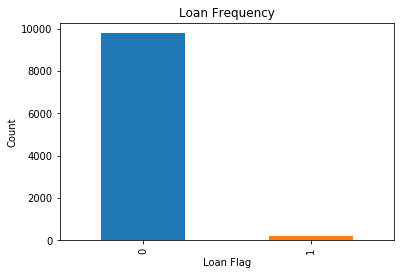

In [20]:
#Plotting the Loan flag counts
df['Loan Flag'].value_counts().plot( kind='bar')
plt.title('Loan Frequency')
plt.xlabel('Loan Flag')
plt.ylabel('Count')
plt.show()

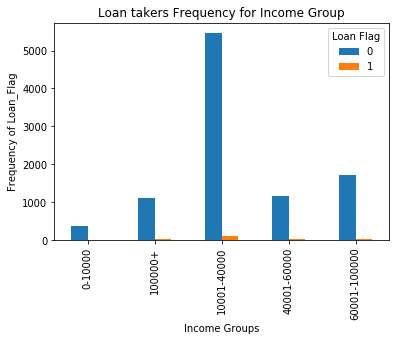

In [21]:
#Plotting the Income Group versus Frequency
pd.crosstab(df["Income Group"],df["Loan Flag"]).plot(kind='bar')
plt.title('Loan takers Frequency for Income Group')
plt.xlabel('Income Groups')
plt.ylabel('Frequency of Loan_Flag')
plt.show()

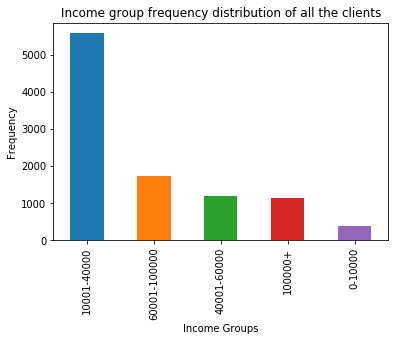

In [22]:
#Similarly plotting the Income group frequency distribution of all the clients
df['Income Group'].value_counts().plot( kind='bar')
plt.title('Income group frequency distribution of all the clients')
plt.xlabel('Income Groups')
plt.ylabel('Frequency')
plt.show()

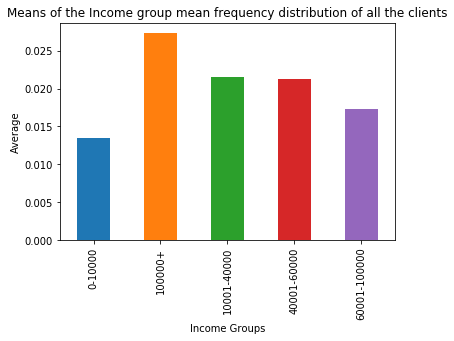

In [23]:
#Similarly plotting the Income group mean frequency distribution of all the clients
df.groupby('Income Group')["Loan Flag"].mean().plot(kind = 'bar')
plt.title('Means of the Income group mean frequency distribution of all the clients')
plt.xlabel('Income Groups')
plt.ylabel('Average')
plt.show()

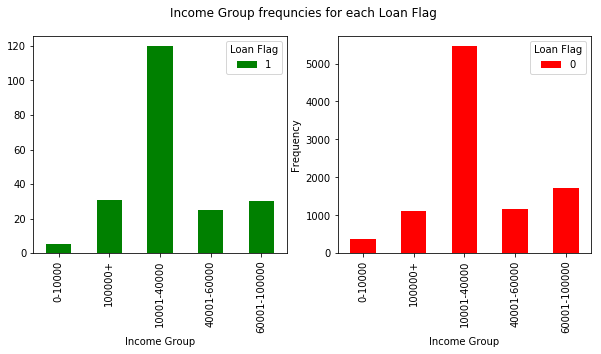

In [24]:
#Plotting the Income group versus frequncy for each Loan Flag
rcParams['figure.figsize'] = 10, 4
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Income Group frequncies for each Loan Flag' )

pd.crosstab(df[df["Loan Flag"] == 1]["Income Group"],df[df["Loan Flag"] == 1]["Loan Flag"]).plot(kind='bar', ax=axes[0], color = "green")
pd.crosstab(df[df["Loan Flag"] == 0]["Income Group"],df[df["Loan Flag"] == 0]["Loan Flag"]).plot(kind='bar', ax=axes[1],color ='red')

plt.xlabel('Income Group')
plt.ylabel('Frequency')
plt.show()


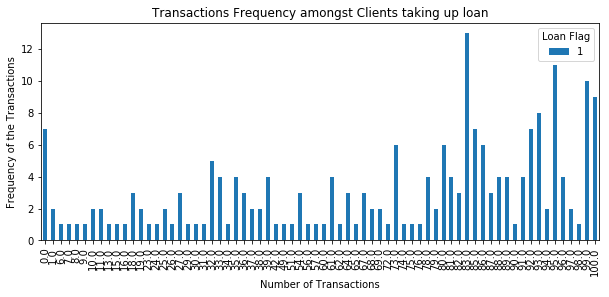

In [25]:
#Plotting the Transactions Frequency amongst Clients that have taken up loan
rcParams['figure.figsize'] = 10, 4
pd.crosstab(df[df["Loan Flag"] == 1]["Num Transactions"],df[df["Loan Flag"] == 1]["Loan Flag"]).plot(kind='bar')
plt.title('Transactions Frequency amongst Clients taking up loan')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency of the Transactions')
plt.show()

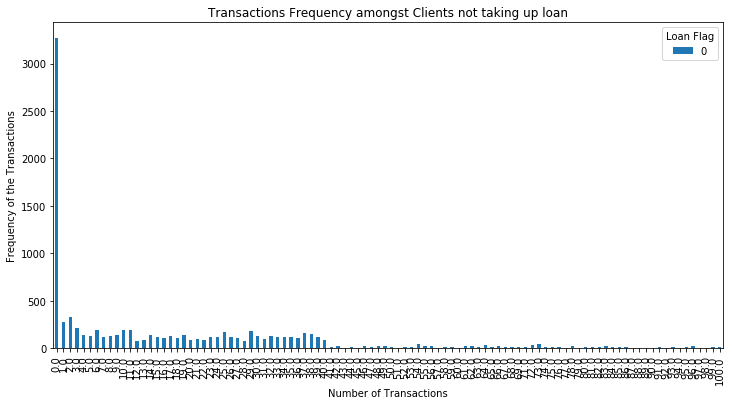

In [26]:
#Plotting the Transactions Frequency amongst Clients that have NOT taken up loan
rcParams['figure.figsize'] = 12, 6
pd.crosstab(df[df["Loan Flag"] == 0]["Num Transactions"],df[df["Loan Flag"] == 0]["Loan Flag"]).plot(kind='bar')
plt.title('Transactions Frequency amongst Clients not taking up loan')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency of the Transactions')
plt.show()

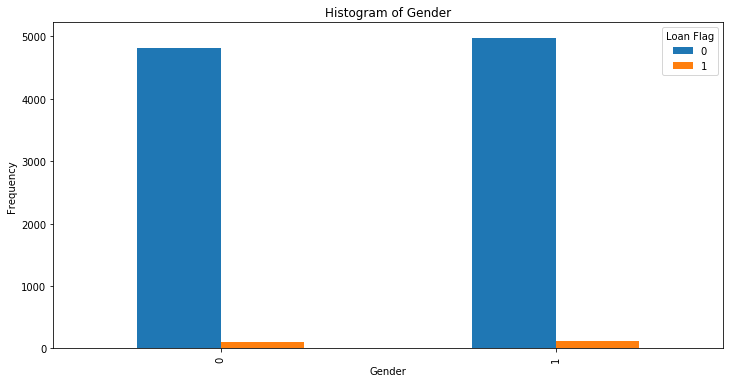

In [27]:
#Plotting the Gender frequency amongst all the clients
pd.crosstab(df["Gender"],df["Loan Flag"]).plot(kind='bar')
plt.title('Histogram of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

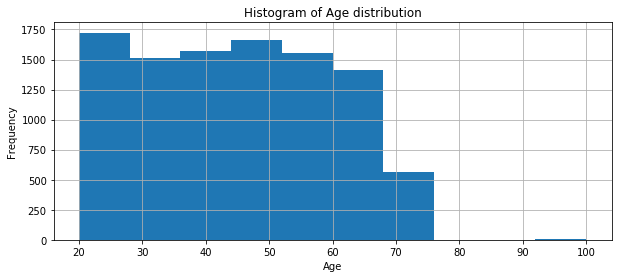

In [28]:
#Plotting the Age frequency
rcParams['figure.figsize'] = 10,4
df.Age.hist()
plt.title('Histogram of Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

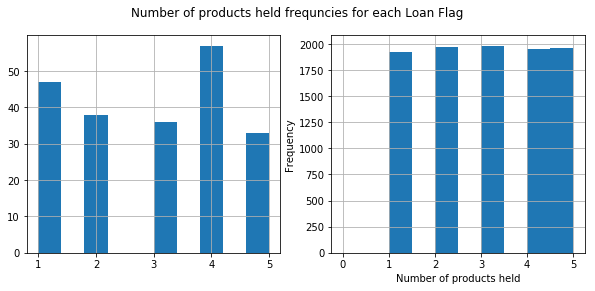

In [29]:
#Plotting the Number of products held frequncies for each Loan Flag
rcParams['figure.figsize'] = 10, 4
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Number of products held frequncies for each Loan Flag' )

df[df["Loan Flag"] == 1]["No_of_products_held"].hist(ax=axes[0])
df[df["Loan Flag"] == 0]["No_of_products_held"].hist(ax=axes[1])

plt.xlabel('Number of products held')
plt.ylabel('Frequency')
plt.show()

<h2>Exploring Insights</h2>

<h4>Major exploration will be on the "Number of Transactions", "Avg CA Transaction Amount" and "Held Loan Previously" columns.
Because, These three seems to have more impact than other attributes.</h4>

In [30]:
df.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
0,0,1,36,1,cork,10001-40000,58,4,1,0.0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0


In [31]:
#Creating the bins for Num of Transactions column
bins = [-1,20,40, 100]
df['Bins'] = pd.cut(df['Num Transactions'], bins)

In [32]:
#Grouping the Bins for frequency
df.groupby("Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Bins,,,,,,,,,,
"(-1, 20]",6389,6389,6389,6389,6389,6389,6389,6389,6389,6389
"(20, 40]",2478,2478,2478,2478,2478,2478,2478,2478,2478,2478
"(40, 100]",1133,1133,1133,1133,1133,1133,1133,1133,1133,1133


In [33]:
#Frequency of the Bins with clients taking loans
df[df["Loan Flag"] == 1].groupby("Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Bins,,,,,,,,,,
"(-1, 20]",25,25,25,25,25,25,25,25,25,25
"(20, 40]",36,36,36,36,36,36,36,36,36,36
"(40, 100]",150,150,150,150,150,150,150,150,150,150


In [34]:
#Frequency of the Bins with clients not taking up any loans
df[df["Loan Flag"] == 0].groupby("Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
Bins,,,,,,,,,,
"(-1, 20]",6364,6364,6364,6364,6364,6364,6364,6364,6364,6364
"(20, 40]",2442,2442,2442,2442,2442,2442,2442,2442,2442,2442
"(40, 100]",983,983,983,983,983,983,983,983,983,983


In [35]:
#Creating the bins for Avg CA Transaction amount column
bins = [-1,100,1000,10000]
df['CA_Bins'] = pd.cut(df['Average_CA_transaction_amount'], bins)

In [36]:
#Grouping the Bins for frequency
df.groupby("CA_Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins
CA_Bins,,,,,,,,,,,
"(-1, 100]",6009,6009,6009,6009,6009,6009,6009,6009,6009,6009,6009
"(100, 1000]",2189,2189,2189,2189,2189,2189,2189,2189,2189,2189,2189
"(1000, 10000]",1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802


In [37]:
#Frequency of the Bins with clients taking up the loans
df[df["Loan Flag"] == 1].groupby("CA_Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins
CA_Bins,,,,,,,,,,,
"(-1, 100]",61,61,61,61,61,61,61,61,61,61,61
"(100, 1000]",26,26,26,26,26,26,26,26,26,26,26
"(1000, 10000]",124,124,124,124,124,124,124,124,124,124,124


In [38]:
#Frequency of the Bins with clients not taking up any loans
df[df["Loan Flag"] == 0].groupby("CA_Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins
CA_Bins,,,,,,,,,,,
"(-1, 100]",5948,5948,5948,5948,5948,5948,5948,5948,5948,5948,5948
"(100, 1000]",2163,2163,2163,2163,2163,2163,2163,2163,2163,2163,2163
"(1000, 10000]",1678,1678,1678,1678,1678,1678,1678,1678,1678,1678,1678


In [39]:
#Interesting Facts

<h4>From the above observation, it is seen that 61 clients have taken up loans even if their avg CA transaction amount is less than 100 Euros </h4>

In [40]:
#Extracting the data for clients with less than 100 Euro avg CA transaction amount and took up loan
df[(df["Average_CA_transaction_amount"] < 100) & (df["Loan Flag"] ==1)]

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
50,1,51,54,1,dublin,60001-100000,0,4,1,81.0,"(40, 100]","(-1, 100]"
249,1,250,45,1,tipperary,40001-60000,0,1,1,92.0,"(40, 100]","(-1, 100]"
431,1,432,70,1,dublin,10001-40000,33,4,1,100.0,"(40, 100]","(-1, 100]"
523,1,524,43,0,maynooth,10001-40000,93,5,1,95.0,"(40, 100]","(-1, 100]"
590,1,591,68,0,dublin,10001-40000,0,1,1,99.0,"(40, 100]","(-1, 100]"
715,1,716,52,1,dublin,60001-100000,0,3,1,100.0,"(40, 100]","(-1, 100]"
734,1,735,33,0,cork,10001-40000,0,2,1,95.0,"(40, 100]","(-1, 100]"
735,1,736,69,0,dublin,60001-100000,0,1,1,85.0,"(40, 100]","(-1, 100]"
901,1,902,37,0,kildare,10001-40000,70,2,1,85.0,"(40, 100]","(-1, 100]"
967,1,968,26,1,dublin,10001-40000,0,3,1,99.0,"(40, 100]","(-1, 100]"


<h4>Insight: All these users have a common factor, i.e All of them belong to the Num of Transactions Bin (40 - 100) </h4>

In [41]:
#Same data grouping by Income group
df[(df["Average_CA_transaction_amount"] < 100) & (df["Loan Flag"] ==1)].groupby("Income Group").count()

,Loan Flag,Client ID,Age,Gender,County,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
Income Group,,,,,,,,,,,
0-10000,1,1,1,1,1,1,1,1,1,1,1
100000+,9,9,9,9,9,9,9,9,9,9,9
10001-40000,35,35,35,35,35,35,35,35,35,35,35
40001-60000,7,7,7,7,7,7,7,7,7,7,7
60001-100000,9,9,9,9,9,9,9,9,9,9,9


<h4>Insight: Majority of the clients have income range between 10000 - 40000 </h4>

In [42]:
#Same data is grouped by Previosu loan holders flag
df[(df["Average_CA_transaction_amount"] < 100) & (df["Loan Flag"] ==1)].groupby("Held Loan previously").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Num Transactions,Bins,CA_Bins
Held Loan previously,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2
1,59,59,59,59,59,59,59,59,59,59,59


<h4>Insight: 95% of these clients have taken up loans previosuly</h4>

In [43]:
#Similarly for avg transactions greater than 1000 euros
df[(df["Average_CA_transaction_amount"] > 1000) & (df["Loan Flag"] ==1)]

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
24,1,25,35,0,None,10001-40000,1159,1,0,35.0,"(20, 40]","(1000, 10000]"
46,1,47,55,0,dublin,10001-40000,2494,4,0,83.0,"(40, 100]","(1000, 10000]"
70,1,71,66,0,dublin,10001-40000,2132,2,0,0.0,"(-1, 20]","(1000, 10000]"
147,1,148,40,1,cork,0-10000,2495,4,1,35.0,"(20, 40]","(1000, 10000]"
240,1,241,57,0,clare,60001-100000,2523,5,1,37.0,"(20, 40]","(1000, 10000]"
268,1,269,29,1,dublin,10001-40000,2653,4,1,51.0,"(40, 100]","(1000, 10000]"
300,1,301,61,1,offaly,100000+,2567,1,1,39.0,"(20, 40]","(1000, 10000]"
490,1,491,26,1,mayo,100000+,8016,4,1,10.0,"(-1, 20]","(1000, 10000]"
565,1,566,21,1,cork,10001-40000,2121,2,1,91.0,"(40, 100]","(1000, 10000]"
572,1,573,27,1,mayo,60001-100000,2287,1,0,89.0,"(40, 100]","(1000, 10000]"


In [44]:
#Again, Grouping with Income group with respective to above filtered data
df[(df["Average_CA_transaction_amount"] > 1000) & (df["Loan Flag"] ==1)].groupby("Income Group").count()

,Loan Flag,Client ID,Age,Gender,County,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
Income Group,,,,,,,,,,,
0-10000,2,2,2,2,2,2,2,2,2,2,2
100000+,20,20,20,20,20,20,20,20,20,20,20
10001-40000,69,69,69,69,69,69,69,69,69,69,69
40001-60000,14,14,14,14,14,14,14,14,14,14,14
60001-100000,19,19,19,19,19,19,19,19,19,19,19


<h4>Insight: Income range 10000 - 40000 are the highest here too</h4>

In [45]:
#grouped by previously held loan flag
df[(df["Average_CA_transaction_amount"] > 1000) & (df["Loan Flag"] ==1)].groupby("Held Loan previously").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Num Transactions,Bins,CA_Bins
Held Loan previously,,,,,,,,,,,
0,52,52,52,52,52,52,52,52,52,52,52
1,72,72,72,72,72,72,72,72,72,72,72


<h4>Insight: This is seems to be stable and not have significant impact</h4>

In [46]:
#grouped by number of transactions bins
df[(df["Average_CA_transaction_amount"] > 1000) & (df["Loan Flag"] ==1)].groupby("Bins").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,CA_Bins
Bins,,,,,,,,,,,
"(-1, 20]",23,23,23,23,23,23,23,23,23,23,23
"(20, 40]",35,35,35,35,35,35,35,35,35,35,35
"(40, 100]",66,66,66,66,66,66,66,66,66,66,66


<h4>Insight: Number of transcations in between 40-100 are double compared to other Bins</h4>

In [47]:
#Filtering the data with number of transactions greater than 40 in clients who tokk up the loan 
df[(df["Num Transactions"] > 40) & (df["Loan Flag"] ==1)]

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
46,1,47,55,0,dublin,10001-40000,2494,4,0,83.0,"(40, 100]","(1000, 10000]"
50,1,51,54,1,dublin,60001-100000,0,4,1,81.0,"(40, 100]","(-1, 100]"
249,1,250,45,1,tipperary,40001-60000,0,1,1,92.0,"(40, 100]","(-1, 100]"
268,1,269,29,1,dublin,10001-40000,2653,4,1,51.0,"(40, 100]","(1000, 10000]"
431,1,432,70,1,dublin,10001-40000,33,4,1,100.0,"(40, 100]","(-1, 100]"
523,1,524,43,0,maynooth,10001-40000,93,5,1,95.0,"(40, 100]","(-1, 100]"
565,1,566,21,1,cork,10001-40000,2121,2,1,91.0,"(40, 100]","(1000, 10000]"
572,1,573,27,1,mayo,60001-100000,2287,1,0,89.0,"(40, 100]","(1000, 10000]"
590,1,591,68,0,dublin,10001-40000,0,1,1,99.0,"(40, 100]","(-1, 100]"
687,1,688,33,1,clare,0-10000,1169,1,1,91.0,"(40, 100]","(1000, 10000]"


In [48]:
#Grouped by Income on the above filter
df[(df["Num Transactions"] > 40) & (df["Loan Flag"] ==1)].groupby("Income Group").count()

,Loan Flag,Client ID,Age,Gender,County,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Bins,CA_Bins
Income Group,,,,,,,,,,,
0-10000,4,4,4,4,4,4,4,4,4,4,4
100000+,20,20,20,20,20,20,20,20,20,20,20
10001-40000,82,82,82,82,82,82,82,82,82,82,82
40001-60000,22,22,22,22,22,22,22,22,22,22,22
60001-100000,22,22,22,22,22,22,22,22,22,22,22


<h4>Insight: Again significantly greater number with income group 10000 - 40000 when compared to other groups</h4>

In [49]:
#Grouped by previous loan held flag on the above filter
df[(df["Num Transactions"] > 40) & (df["Loan Flag"] ==1)].groupby("Held Loan previously").count()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Num Transactions,Bins,CA_Bins
Held Loan previously,,,,,,,,,,,
0,28,28,28,28,28,28,28,28,28,28,28
1,122,122,122,122,122,122,122,122,122,122,122


<h4>Insight : Again significantly higher percentage of previous loan takers comapred with others</h4>

<h3>Exploring County attribute</h3>

In [50]:
#Grouped the data on county amongst all the clients
a = df.groupby("County")["Loan Flag"].count()

In [51]:
#Grouped the data on county amongst loan takers
b = df[df["Loan Flag"] == 1].groupby("County")["Loan Flag"].count()

In [52]:
c = b/a

<h4>Top 10 counties with good loan flag ratio</h4>

In [53]:
c.sort_values(ascending=False).head(10)

County
maynooth     1.000000
kilkenny     0.037267
clare        0.037162
waterford    0.036364
None         0.035714
wicklow      0.026596
laois        0.025641
longford     0.025510
monaghan     0.024390
offaly       0.022535
Name: Loan Flag, dtype: float64

<h2>Business Insights/Benefits</h2>

<ul>
  <li>Major attributes to be focused for lending more loans are Avg_CA_tansactions amount, Number of transcations and Previous loan flag </li>
  <li>Almost 74% of the new loan takers held a loan previously, So focus on the previous loan holders</li>
  <li>If clients have high number of transactions (greater than 40), 13% of these clients have taken up loan</li>
  <li>Amongst the clients that have average CA transaction amount greater than 1000 euros, 6.9% of them have taken up loan</li>
  <li><b>If the Average Transaction amount is less than 1000, but client's number of transactions are greater than 40 or if they have held a loan previously, then there is high probability (Almost probability = 1) of them taking up a loan</b></li>
  <li>Majority (57 %) of the clients who took up loan are in the income rrange (10000 - 40000)</li>
  <li>Top 10 counties who have relatively higher percentage of clients that have taken up loans is found above</li>
</ul>

<h2>High likelihood clients for Loan purchase are</h2>

<ul>
  <li>Clients with Avg transaction amount greater than 1000 </li>
  <li>Clients with Number of transcation greater than 40</li>
    <li>Clients who held loans previously</li>
  <li>Clients with Income group (10000 to 40000)</li>
    <li>Clients with combination of any two of the above factors</li>
</ul>